<a href="https://colab.research.google.com/github/chandradutta/CS23M021_A1/blob/master/DL_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing wandb
!pip install wandb
import wandb
from wandb.keras import WandbCallback
import socket
socket.setdefaulttimeout(30)
wandb.login()
wandb.init(project='DL_Assignment_1')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.2 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: chandraduttamamidi (cs23m021). Use `wandb login --relogin` to force relogin


4422102/4422102 [==============================] - 0s 0us/step


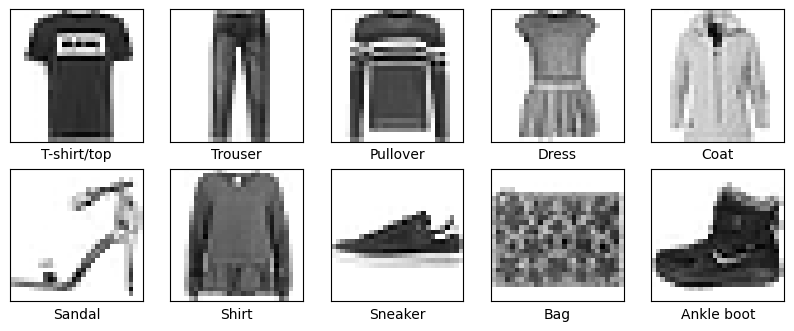

In [2]:
# import wandb
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# wandb.init(project="fashion-mnist-sample-images")

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
# print (len(train_images[0]))


# Defining class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
    idx = next(idx for idx, label in enumerate(y_train) if label == i)
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[i])
    # wandb.log({f"example_{class_names[i]}": [wandb.Image(x_train[idx], caption=class_names[i])]})

# wandb.finish()


In [3]:
# turn the data into an appropriate matrix form
import numpy as np
# x_train = np.reshape(x_train, (60000, 784, 1))
# y_train = np.reshape(y_train, (60000, 1))
x_train = x_train / 255

In [4]:
import numpy as np
def sigmoid(z):
    clipped_z=np.clip(z,-500, 500)
    return 1 / (1 + np.exp(-clipped_z))

def softmax(z):
    # z=np.clip(z,-500,+500)
    eps = 1e-6
    return (np.exp(z-max(z)) / (sum(np.exp(z-max(z))) + eps))
def tanh(z):
  clipped_z = np.clip(z, -50, 50)
  return np.tanh(clipped_z)
def tanh_derivative(z):
  return 1-np.tanh(z)**2
def relu(Z):
    A = np.maximum(0, Z)
    return A
def relu_derivative(z):
  return np.where(z>0,1,0)
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))
def tanh_derivative(z):
  return 1-np.tanh(z)**2
def compute_loss_gradient(y, y_pred,L_fun):
   if(L_fun=="cross_entropy"):
    yt=np.zeros((10,1))
    # print(y)
    # print(yt)
    yt[y]=1
    l=-np.subtract(yt,y_pred)
    # print(yt)
    # return -(yt - y_pred)
   else:
     l= (y_pred-y)*(y_pred)*(1-y_pred)
   return l

In [5]:
def weights(num_of_layers,n):
  ws=[]
  ns=[]
  bs=[]
  # for i in range(num_of_layers):
  #   ns.append(int(input()))
  # return ns
  ws.append(0.01*np.random.randn(n,784))
  bs.append(0.01*np.random.randn(n,1))
  for i in range(1,num_of_layers):
    ws.append(0.01*np.random.randn(n,n))
    bs.append(0.01*np.random.randn(n,1))
  ws.append(0.01*np.random.randn(10,n))
  bs.append(0.01*np.random.randn(10,1))
  return ws,bs

def xavier_weights(num_of_layers,n):
  ws=[]
  ns=[]
  bs=[]
  # for i in range(num_of_layers):
  #   ns.append(int(input()))
  # return ns
  ws.append(0.01*np.random.randn(n,784))
  bs.append(np.zeros((n,1)))
  for i in range(1,num_of_layers):
    ws.append(0.01*np.random.randn(n,n))
    bs.append(np.zeros((n,1)))
  ws.append(0.01*np.random.randn(10,n))
  bs.append(np.zeros((10,1)))
  return ws,bs
# def weight_intialization_Xavier(no_of_layers,no_neurons_per_layer):
#   w_s_xavier=[]
#   b_s_xavier=[]
#   w_s_xavier.append((np.random.randn(no_neurons_per_layer,784)))
#   b_s_xavier.append(np.zeros((no_neurons_per_layer,1)))
#   for i in range(1,no_of_layers):
#     w_s_xavier.append((np.random.randn(no_neurons_per_layer,no_neurons_per_layer)))
#     b_s_xavier.append(np.zeros((no_neurons_per_layer,1)))
#   w_s_xavier.append((np.random.randn(10,no_neurons_per_layer)))
#   b_s_xavier.append(np.zeros((10,1)))
#   # print(w_s_xavier[i].shape for i in range(len(w_s_xavier)))
#   # print(b_s_xavier[i].shape for i in range(len(b_s_xavier)))
#   return w_s_xavier,b_s_xavier

In [42]:



def forward_propagation(X, ws, bs,activationfun):
    activations = []
    pre_activations = []
    sum=[]
    a = X.flatten().reshape(784,1)
    activations.append(a)
    for i in range(len(ws) - 1):
        z = np.dot(ws[i], a) + bs[i]
        pre_activations.append(z)
        if activationfun == 'tanh':
           a = np.tanh(z)
        elif activationfun=='sigmoid':
           a = sigmoid(z)
        else:
           a=relu(z)
        # activations.append(a)
        activations.append(a)

    # Last layer with softmax activation
    z_last = np.dot(ws[-1], a) + bs[-1]
    pre_activations.append(z_last)
    # print(pre_activations[-1].shape)
    a_last = softmax(z_last)
    # print(a_last.shape)
    sum.append(a_last)
    activations.append(a_last)
    # print(pre_activations[0].shape,pre_activations[1].shape,pre_activations[2].shape)
    # print(activations[0].shape,activations[1].shape,activations[2].shape,activations[3].shape)
    # print(theta_w[0].shape,theta_w[1].shape,theta_w[2].shape)
    # print(theta_b[0].shape,theta_b[1].shape,theta_b[2].shape)


    return activations, pre_activations

# num_of_layers=int(input())
# theta_w,theta_b=weights(num_of_layers)
# activations, pre_activations= forward_propagation(x_train[1], theta_w, theta_b)
# gradient_descent(theta_w,theta_b,x_train,y_train,0.01,5)

# all_activations = []
# all_pre_activations = []
# all_sum = []

# for sample in x_train:
#     # Perform forward propagation for the current sample
#     activations, pre_activations, sum = forward_propagation(sample, theta_w, theta_b)

#     # Append the results to the respective lists
#     all_activations.append(activations)
#     all_pre_activations.append(pre_activations)
#     all_sum.append(sum)
# total_sum = np.sum(all_sum)
# print("Sum of all values:", total_sum)

In [43]:

# def backpropagation(X, y, activations, pre_activations, theta_w, theta_b):
#     # num_layers = len(activations)
#     # num_samples = X.shape[1]

#     gradients_weights = []
#     gradients_biases = []

#     # Compute output gradient
#     output_gradient = compute_loss_gradient(y, activations[-1])
#     print(output_gradient.shape)

#     # Backpropagate the gradients
#     for k in range(2, -1, -1):
#         # Compute gradients w.r.t. parameters
#         gradients_weights.append(np.matmul(output_gradient, activations[k].T))
#         print(output_gradient.shape,activations[k].T.shape)
#         gradients_biases.append(output_gradient)
#         # Compute gradients w.r.t. layer below
#         hidden_gradient = np.matmul(theta_w[k].T, output_gradient)
#         # print(hidden_gradient.shape)
#         # Compute gradients w.r.t. layer below (pre-activation)
#         if k > 1:
#             activation_derivative = sigmoid_derivative(pre_activations[k-1])
#             # print(activation_derivative.shape)
#             output_gradient =np.matmul(hidden_gradient,activation_derivative)
#         else:
#             output_gradient = hidden_gradient
def backpropagation(X, y, activations, pre_activations, theta_w, theta_b,activationfun,L_fun):
    gradients_weights = []
    gradients_biases = []

    # Compute output gradient
    output_gradient = compute_loss_gradient(y, activations[-1],L_fun)
    # print(output_gradient.shape)
    # Backpropagate the gradients

    for k in range(len(pre_activations) - 1, -1, -1):
        # Compute gradients w.r.t. parameters
        # print(len(activations))
        gradients_weights.append(np.matmul(output_gradient, activations[k].T))
        gradients_biases.append(output_gradient)

        # # Compute gradients w.r.t. layer below
        # hidden_gradient = np.matmul(theta_w[k].T, output_gradient)

        # Compute gradients w.r.t. layer below (pre-activation)
        if k > 0:
            # Compute gradients w.r.t. layer below
            hidden_gradient = np.matmul(theta_w[k].T, output_gradient)
            # print(hidden_gradient.shape)
            if activationfun == 'tanh':
                 activation_derivative = tanh_derivative(pre_activations[k-1])
            elif activationfun=='sigmoid':
                 activation_derivative = sigmoid_derivative(pre_activations[k-1])
            else:
                 activation_derivative = relu_derivative(pre_activations[k-1])
            output_gradient = np.multiply(hidden_gradient, activation_derivative)

        else:
            output_gradient = hidden_gradient

    # return gradients_weights, gradients_biases


    return gradients_weights, gradients_biases

In [44]:
def accuracy(theta_w,theta_b,x_train,y_train,activationfun,split,L_fun):
  accuracy=0
  count=0
  # squarred_error=0
  for i in range(int(len(x_train)*(1-split))):
    act,p_act=forward_propagation(x_train[i],theta_w,theta_b,activationfun)
    if(np.argmax(act[-1])==y_train[i]):
      accuracy+=1
    temp=act[-1]
    # if(L_fun=="cross_entropy"):
    count=count-np.log(temp[y_train[i]])
    # elif (L_fun=="mean_squared_error"):
    #  count+=np.sum((y_train[i] -act[-1]) ** 2)
  # return (accuracy/540),count/(54000)
  return (accuracy/(int(len(x_train))))*100,count/(54000)

def validation(theta_w,theta_b,x_train,y_train,activationfun,split,L_fun):
  accuracy=0
  count=0
  start_index = int(len(x_train) * split)

  for i in range(start_index, len(x_train)):
    act,p_act=forward_propagation(x_train[i],theta_w,theta_b,activationfun)
    if(np.argmax(act[-1])==y_train[i]):
      accuracy+=1
    temp=act[-1]
    # if(L_fun=="cross_entropy"):
    count=count-np.log(temp[y_train[i]])
    # elif (L_fun=="mean_squared_error"):
    #  count+=np.sum((y_train[i] -act[-1]) ** 2)
  return (accuracy/(int(len(x_train))))*100,count/(54000)


In [45]:
import numpy as np

def do_mgd(max_epochs, X, Y, theta_w, theta_b, eta, beta,weight_decay,activationfun,split,batch_size,L_fun):
    prev_dw = [np.zeros_like(w) for w in theta_w]  # Initialize previous gradients for weights
    prev_db = [np.zeros_like(b) for b in theta_b]  # Initialize previous gradients for biases
    beta=1
    for epoch in range(max_epochs):
        i = 0
        dw = [0 for i in range(len(theta_w))]
        db = [0 for i in range(len(theta_b))]
        for k in range (int(60000*(1-split))):
            activations, pre_activations= forward_propagation(x_train[k],theta_w,theta_b, activationfun)

            # Backward propagation
            a = x_train[k].flatten().reshape(784,1)

            gradients_weights, gradients_biases = backpropagation(a,y_train[k],activations, pre_activations,theta_w,theta_b, activationfun,L_fun)
            gradients_weights.reverse()
            gradients_biases.reverse()

            # Update weights and biases using momentum
            for i in range(len(theta_w)):
                dw[i] +=gradients_weights[i]  # Compute momentum-based gradient for weights
                db[i] +=gradients_biases[i]  # Compute momentum-based gradient for biases

            if(k+1)%batch_size==0:
              # Update weights and biases
              for i in range(len(theta_w)) :
                # temp1=eta*dw[i]+(beta*prev_dw[i])
                # temp2=eta*db[i]+(beta*prev_db[i])
                prev_dw[i] = beta*prev_dw[i] + dw[i]
                prev_db[i] = beta*prev_db[i] + db[i]
                theta_w[i] -= (prev_dw[i]*eta)-(weight_decay*theta_w[i])
                theta_b[i] -= prev_db[i]*eta
                # print(theta_w[i][0][0])
                # Update previous gradients for the next iteration

        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,split,L_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,split,L_fun)
        # print(acc)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})

In [46]:
def do_rmsprop(max_epochs, X_train, y_train, theta_w, theta_b, eta, beta,weight_decay,activationfun,split,batch_size,L_fun):
    # Initialization
    v_dw = [np.zeros_like(w) for w in theta_w]  # Initialize squared gradients for weights
    v_db = [np.zeros_like(b) for b in theta_b]  # Initialize squared gradients for biases
    eps = 1e-4  # Small constant to prevent division by zero

    for epoch in range(max_epochs):
        d_w = [0 for i in range(len(theta_w))]
        d_b = [0 for i in range(len(theta_b))]

        for k in range (int(60000*(1-split))):
            activations, pre_activations= forward_propagation(x_train[k],theta_w,theta_b, activationfun)

            # Backward propagation
            a = x_train[k].flatten().reshape(784,1)

            gradients_weights, gradients_biases = backpropagation(a,y_train[k],activations, pre_activations,theta_w,theta_b, activationfun,L_fun)
            gradients_weights.reverse()
            gradients_biases.reverse()
            # Compute squared gradients and update parameters

            for i in range(len(theta_w)):
                d_w[i] += gradients_weights[i]
                d_b[i] += gradients_biases[i]

                # v_dw[i] = beta * v_dw[i] + (1 - beta) * gradients_weights[i] ** 2  # RMSprop update for weights
                # v_db[i] = beta * v_db[i] + (1 - beta) * gradients_biases[i] ** 2  # RMSprop update for biases


            if(k+1)%batch_size==0:
              v_dw[i] = (1 - beta) * (d_w[i] ** 2) + beta * v_dw[i]  # RMSprop update for weights
              v_db[i] = (1 - beta) * (d_b[i] ** 2) + beta * v_db[i]
              # Update weights and biases
              theta_w[i] -= (eta * gradients_weights[i] / (np.sqrt(v_dw[i]) + eps))-weight_decay*theta_w[i]
              theta_b[i] -= eta * gradients_biases[i] / (np.sqrt(v_db[i]) + eps)

        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,split,L_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,split,L_fun)
        # print(acc)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})


In [47]:
# def do_nag(max_iterations, X_train, y_train, theta_w, theta_b, eta, beta,weight_decay,activationfun,split,batch_size,L_fun):
#     prev_dw = [np.zeros_like(w) for w in theta_w]  # Initialize previous gradients for weights
#     prev_db = [np.zeros_like(b) for b in theta_b]  # Initialize previous gradients for biases

#     for j in range(max_iterations):
#         for k in range (int(60000*(1-split))):

#             lookahead_weights = [w - beta * prev_dw[i] for i, w in enumerate(theta_w)]
#             lookahead_biases = [b - beta * prev_db[i] for i, b in enumerate(theta_b)]

#             # Backward propagation
#             a = x_train[k].flatten().reshape(784,1)

#             # Forward propagation
#             activations, pre_activations = forward_propagation(a, lookahead_weights, lookahead_biases,activationfun,L_fun)

#             # Backward propagation
#             gradients_weights, gradients_biases = backpropagation(a,y_train[k], activations, pre_activations, lookahead_weights, lookahead_biases,activationfun)
#             gradients_weights.reverse()
#             gradients_biases.reverse()

#             # Update weights and biases
#             for i in range(len(theta_w)):
#                 dw[i] = beta * prev_dw[i] + eta * gradients_weights[i]  # Compute momentum-based gradient for weights
#                 db[i] = beta * prev_db[i] + eta * gradients_biases[i]  # Compute momentum-based gradient for biases
#                 if(k+1)%batch_size==0:
#                  # Update weights and biases
#                  theta_w[i] -= (dw)-weight_decay*theta_w[i]
#                  theta_b[i] -= db

#                  # Update previous gradients for the next iteration
#                  prev_dw[i] = dw
#                  prev_db[i] = db
#         acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,split,L_fun)
#         v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,split)
#         wandb.log({"Train_Accuracy" : acc})
#         wandb.log({"Train_Loss" : loss})
#         wandb.log({"Validation_acc" : v_acc})
#         wandb.log({"Validation_loss" : v_loss})
def do_nag(max_iterations, X_train, y_train, theta_w, theta_b, eta, beta, weight_decay, activationfun, split, batch_size,L_fun):
    prev_dw = [np.zeros_like(w) for w in theta_w]  # Initialize previous gradients for weights
    prev_db = [np.zeros_like(b) for b in theta_b]  # Initialize previous gradients for biases

    for j in range(max_iterations):
        dw = [np.zeros_like(w) for w in theta_w]  # Initialize gradient for weights
        db = [np.zeros_like(b) for b in theta_b]  # Initialize gradient for biases

        for k in range(int(60000 * (1 - split))):

            lookahead_weights = [theta_w[i] - beta * prev_dw[i] for i in range(len(theta_w))]
            lookahead_biases = [theta_b[i] - beta * prev_db[i] for i in range(len(theta_b))]

            # Backward propagation
            a = X_train[k].flatten().reshape(784, 1)

            # Forward propagation
            activations, pre_activations = forward_propagation(a, lookahead_weights, lookahead_biases, activationfun)

            # Backward propagation
            gradients_weights, gradients_biases = backpropagation(a, y_train[k], activations, pre_activations, lookahead_weights, lookahead_biases, activationfun,L_fun)
            gradients_weights.reverse()
            gradients_biases.reverse()
            # Update velocities

            for i in range(len(theta_w)):

                dw[i]+= gradients_weights[i]  # Compute momentum-based gradient for weights
                db[i]+= gradients_biases[i]  # Compute momentum-based gradient for biases
            # for i in range(len(theta_w)):
            #     d_w[i] = beta * prev_dw[i] + eta * dw[i]  # Compute momentum-based gradient for weights
            #     d_b[i] = beta * prev_db[i] + eta * db[i]  # Compute momentum-based gradient for biases
            #     if(k+1)%batch_size==0:
            # Update weights and biases
            for i in range(len(theta_w)):
                theta_w[i] -= (beta * prev_dw[i] + eta * dw[i]) - weight_decay * theta_w[i]  # Update weights
                theta_b[i] -= beta * prev_db[i] + eta * db[i]  # Update biases

            # Update previous gradients for the next iteration
            prev_dw = dw
            prev_db = db
        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,split,L_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,split,L_fun)
        # print(acc)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})
    # return theta_w, theta_b


In [48]:
def do_adam(max_epochs, X_train, y_train, theta_w, theta_b, eta, beta1, beta2,weight_decay,activationfun,split,batch_size,L_fun):
    # Initialization
    m_dw = [np.zeros_like(w) for w in theta_w]  # Initialize first moment for weights
    m_db = [np.zeros_like(b) for b in theta_b]  # Initialize first moment for biases
    v_dw = [np.zeros_like(w) for w in theta_w]  # Initialize second moment for weights
    v_db = [np.zeros_like(b) for b in theta_b]  # Initialize second moment for biases
    eps = 1e-8  # Small constant to prevent division by zero
    t = 0  # Time step initialization

    for epoch in range(max_epochs):
        d_w = [0 for _ in range(len(theta_w))]
        d_b = [0 for _ in range(len(theta_b))]
        for k in range (int(60000*(1-split))):

            # Backward propagation
            a = x_train[k].flatten().reshape(784,1)
            t += 1


            # Forward propagation
            activations, pre_activations = forward_propagation(a,theta_w, theta_b,activationfun)

            # Backward propagation
            gradients_weights, gradients_biases = backpropagation(a,y_train[k], activations, pre_activations, theta_w, theta_b,activationfun,L_fun)
            gradients_weights.reverse()
            gradients_biases.reverse()
            for i in range(len(pre_activations) ):
                d_w[i] += gradients_weights[i]
                d_b[i] += gradients_biases[i]
            if(k+1)%batch_size==0:
                # Update biased first moment estimates
                for i in range(len(theta_w)):
                    m_dw[i] = beta1 * m_dw[i] + (1 - beta1) * d_w[i]  # Update first moment for weights
                    m_db[i] = beta1 * m_db[i] + (1 - beta1) * d_b[i]  # Update first moment for biases

                # Update biased second raw moment estimates
                for i in range(len(theta_w)):
                    v_dw[i] = beta2 * v_dw[i] + (1 - beta2) * d_w[i] ** 2  # Update second moment for weights
                    v_db[i] = beta2 * v_db[i] + (1 - beta2) * d_b[i] ** 2  # Update second moment for biases
                # Correct bias in first moment
                m_dw_corrected = [m / (1 - beta1 ** t) for m in m_dw]  # Correct first moment for weights
                m_db_corrected = [m / (1 - beta1 ** t) for m in m_db]  # Correct first moment for biases

                # Correct bias in second moment
                v_dw_corrected = [v / (1 - beta2 ** t) for v in v_dw]  # Correct second moment for weights
                v_db_corrected = [v / (1 - beta2 ** t) for v in v_db]  # Correct second moment for biases

                # Update parameters
                for i in range(len(theta_w)):
                  theta_w[i] -= (eta * m_dw_corrected[i] / (np.sqrt(v_dw_corrected[i]) + eps))-weight_decay*theta_w[i]  # Update weights
                  theta_b[i] -= eta * m_db_corrected[i] / (np.sqrt(v_db_corrected[i]) + eps)  # Update biases
            for a in d_w:
                    a[:] = 0
            for b in d_b:
                    b[:] = 0
            t+= 1
        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,split,L_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,split,L_fun)
        # print(acc)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})


In [53]:
def do_nadam(max_epochs, X_train, y_train, theta_w, theta_b, eta, beta1, beta2,weight_decay,activationfun,split,batch_size,L_fun):
    # Initialization
    m_dw = [np.zeros_like(w) for w in theta_w]  # Initialize first moment for weights
    m_db = [np.zeros_like(b) for b in theta_b]  # Initialize first moment for biases
    v_dw = [np.zeros_like(w) for w in theta_w]  # Initialize second moment for weights
    v_db = [np.zeros_like(b) for b in theta_b]  # Initialize second moment for biases
    eps = 1e-8  # Small constant to prevent division by zero
    t = 0  # Time step initialization

    for epoch in range(max_epochs):
        d_w = [0 for _ in range(len(theta_w))]
        d_b = [0 for _ in range(len(theta_b))]
        for k in range (int(60000*(1-split))):

            # Backward propagation
            a = x_train[k].flatten().reshape(784,1)
            t += 1


            # Forward propagation
            activations, pre_activations = forward_propagation(a,theta_w, theta_b,activationfun)

            # Backward propagation
            gradients_weights, gradients_biases = backpropagation(a,y_train[k], activations, pre_activations, theta_w, theta_b,activationfun,L_fun)
            gradients_weights.reverse()
            gradients_biases.reverse()
            for i in range(len(pre_activations) ):
                d_w[i] += gradients_weights[i]
                d_b[i] += gradients_biases[i]
            if(k+1)%batch_size==0:
                # Update biased first moment estimates
                for i in range(len(theta_w)):
                    m_dw[i] = beta1 * m_dw[i] + (1 - beta1) * d_w[i]  # Update first moment for weights
                    m_db[i] = beta1 * m_db[i] + (1 - beta1) * d_b[i]  # Update first moment for biases

                # Update biased second raw moment estimates
                for i in range(len(theta_w)):
                    v_dw[i] = beta2 * v_dw[i] + (1 - beta2) * d_w[i] ** 2  # Update second moment for weights
                    v_db[i] = beta2 * v_db[i] + (1 - beta2) * d_b[i] ** 2  # Update second moment for biases
                # Correct bias in first moment
                m_dw_corrected = [m / (1 - beta1 ** t) for m in m_dw]  # Correct first moment for weights
                m_db_corrected = [m / (1 - beta1 ** t) for m in m_db]  # Correct first moment for biases

                # Correct bias in second moment
                v_dw_corrected = [v / (1 - beta2 ** t) for v in v_dw]  # Correct second moment for weights
                v_db_corrected = [v / (1 - beta2 ** t) for v in v_db]  # Correct second moment for biases

                v_dw_nesterov = [beta1 * m + ((1 - beta1) * gradients_weights[i] / (1 - beta1 ** t)) for i, m in enumerate(m_dw)]
                v_db_nesterov = [beta1 * m + ((1 - beta1) * gradients_biases[i] / (1 - beta1 ** t)) for i, m in enumerate(m_db)]
                # Update parameters
                for i in range(len(theta_w)):
                  norm_dw=np.linorg.norm(v_dw_corrected[i])
                  norm_db=np.linorg.norm(v_db_corrected[i])
                  theta_w[i] -= (eta * v_dw_nesterov[i] / (np.sqrt(norm_dw) + eps))-weight_decay*theta_w[i]  # Update weights
                  theta_b[i] -= eta * v_db_nesterov[i] / (np.sqrt(norm_dw) + eps)  # Update biases
            for a in d_w:
                    a[:] = 0
            for b in d_b:
                    b[:] = 0
            t+= 1
        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,split,L_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,split,L_fun)
        # print(acc)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})


Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7fe7d3f32fb0>> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7fe7d3f32fb0>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

In [50]:
def gradient_descent(theta_w,theta_b,x_train,y_train, learning_rate, max_iterations,activationfun,split,weight_decay,L_fun):
    for t in range(max_iterations):
        # Forward propagation6
        d_w = [[np.zeros_like(w) for w in layer] for layer in theta_w]
        d_b = [[np.zeros_like(b) for b in layer] for layer in theta_b]
        # print(d_w[-1])
        for k in range (int(60000*(1-split))):
            activations, pre_activations= forward_propagation(x_train[k],theta_w,theta_b,activationfun)

            # Backward propagation
            a = x_train[k].reshape(784,1)

            gradients_weights, gradients_biases = backpropagation(a,y_train[k],activations, pre_activations,theta_w,theta_b,activationfun,L_fun)
            gradients_weights.reverse()
            gradients_biases.reverse()

            d_w+=gradients_weights
            d_b+=gradients_biases

        # Update parameters using gradients
            for i in range(len(theta_w)):
              # theta_w[i] = theta_w[i] - learning_rate * np.sum(d_w[i], axis=0, keepdims=True)
              # theta_b[i] = theta_b[i] - learning_rate * np.sum(d_b[i], axis=0, keepdims=True)
              theta_w[i] = (theta_w[i] - learning_rate * gradients_weights[i])-weight_decay*theta_w[i]
              theta_b[i] = theta_b[i] - learning_rate * gradients_biases[i]
        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,split)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,split)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})
    # a=1
    # return a
# theta_w=[]
# theta_b=[]

# theta_w,theta_b=weights(3,32)

# # theta_w,theta_b=xavier_weights(3,16)
# learning_rate=0.0001
# max_iterations=5
# activationfun="tanh"
# gradient_descent(theta_w,theta_b,x_train,y_train, learning_rate, max_iterations,activationfun)
# beta = 0.9
# beta1=0.9
# beta2=0.99
# weight_decay=0
# split=0.1
# batch_size=16
# L_fun="mean_squared_error"
# do_mgd(max_iterations, x_train, y_train, theta_w, theta_b, learning_rate, beta, weight_decay, activationfun,split,batch_size,L_fun)
# do_nag(max_iterations, x_train, y_train, theta_w, theta_b, learning_rate, beta, weight_decay, activationfun,split,batch_size,L_fun)
# do_rmsprop(max_iterations, x_train, y_train, theta_w, theta_b, learning_rate, beta, weight_decay, activationfun,split,batch_size,L_fun)
# do_adam(max_iterations, x_train, y_train, theta_w, theta_b, learning_rate, beta, beta1, weight_decay, activationfun,split,batch_size,L_fun)
# do_nadam(max_iterations, x_train, y_train, theta_w, theta_b, learning_rate, beta, beta1,weight_decay,activationfun)

In [51]:
def mainfunction(optimization_algorithm,max_iterations, x_train, y_train, theta_w, theta_b,learning_rate, beta,beta1,weight_decay,activationfun,split,batch_size,L_fun):
  if optimization_algorithm == 'mgd':
    do_mgd(max_iterations, x_train, y_train, theta_w, theta_b, learning_rate, beta, weight_decay, activationfun,split,batch_size,L_fun)
  elif optimization_algorithm == 'ngd':
    do_nag(max_iterations, x_train, y_train, theta_w, theta_b, learning_rate, beta, weight_decay, activationfun,split,batch_size,L_fun)
  elif optimization_algorithm == 'rmsprop':
    do_rmsprop(max_iterations, x_train, y_train, theta_w, theta_b, learning_rate, beta, weight_decay, activationfun,split,batch_size,L_fun)
  elif optimization_algorithm == 'adam':
    do_adam(max_iterations, x_train, y_train, theta_w, theta_b, learning_rate, beta, beta1, weight_decay, activationfun,split,batch_size,L_fun)
  elif optimization_algorithm == 'nadam':
    do_nadam(max_iterations, x_train, y_train, theta_w, theta_b, learning_rate, beta, beta1, weight_decay, activationfun,split,batch_size,L_fun)
  else:
    gradient_descent(theta_w,theta_b,x_train,y_train, learning_rate, max_iterations,activationfun,split,weight_decay)

def main():
  wandb.init(project="DL_Assignment_1", entity="cs23m021")
  p=wandb.config
  with wandb.init(project='DL_Assignment_1') as run:
    theta_w=[]
    theta_b=[]
    if (p.weightInit=="random"):
      theta_w,theta_b=weights(p.n,p.neurons)
    if (p.weightInit=="xavier"):
      theta_w,theta_b=xavier_weights(p.n,p.neurons)
    mainfunction(p.optimization_algorithm,p.max_iterations,x_train, y_train,theta_w, theta_b,p.learning_rate,0.9,0.99,p.weight_decay,p.activationfun,0.1,p.batch_size,p.L_fun)

parameters_from_sweep = {
    'method' : 'bayes',
    'name'   : 'Accuracy',
    'metric' : {
        'goal' : 'maximize',
        'name' : 'Accuracy',
    },
    'parameters' : {
        'neurons':{'values':[32,64,128]},
        'optimization_algorithm':{'values':['mgd','ngd','rmsprop','adam','nadam','sgd']},
        'max_iterations' : {'values' : [5,10]},
        'n'       : {'values' : [3,4,5]},
        'weight_decay' : {'values' : [0] } ,
        'learning_rate' : {'values' : [0.0001,0.00001]},
        'weightInit' : {'values': ['random','xavier']},
        'batch_size' : {'values': [16,32,64]},
        'L_fun':{'values':['cross_entropy','mean_squared_error']},
        'activationfun' : {'values' : ['sigmoid','tanh','relu']}
    }
}

sweepId = wandb.sweep(parameters_from_sweep,project = 'DL_Assignment_1')
wandb.agent(sweepId,function=main,count=2)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: ogfu5nw8
Sweep URL: https://wandb.ai/cs23m021/DL_Assignment_1/sweeps/ogfu5nw8


wandb: Agent Starting Run: kjhtku43 with config:
wandb: 	L_fun: mean_squared_error
wandb: 	activationfun: tanh
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	max_iterations: 10
wandb: 	n: 5
wandb: 	neurons: 128
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: Ctrl + C detected. Stopping sweep.


Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7fe7d3f32fb0>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe